<a href="https://colab.research.google.com/github/gitHubAndyLee2020/TF_Image_Classification_Projects/blob/main/MNIST_prediction_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import tensorflow_datasets as tfds

In [75]:
(train_data, test_data), ds_info = tfds.load(
    'mnist',
    split=['train', 'test'],
    shuffle_files=True,
    as_supervised=True,
    with_info=True,
)

In [21]:
len(train_data), len(test_data)

(60000, 10000)

In [10]:
ds_info.features

FeaturesDict({
    'image': Image(shape=(28, 28, 1), dtype=uint8),
    'label': ClassLabel(shape=(), dtype=int64, num_classes=10),
})

In [11]:
class_names = ds_info.features["label"].names
class_names

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

In [12]:
train_one_sample = train_data.take(1)

In [13]:
for image, label in train_one_sample:
  print(f"""
  Image shape: {image.shape}
  Image dtype: {image.dtype}
  Target class from MNIST: {label}
  Class name: {class_names[label.numpy()]}
  """)


  Image shape: (28, 28, 1)
  Image dtype: <dtype: 'uint8'>
  Target class from MNIST: 4
  Class name: 4
  


In [15]:
tf.reduce_min(image), tf.reduce_max(image)

(<tf.Tensor: shape=(), dtype=uint8, numpy=0>,
 <tf.Tensor: shape=(), dtype=uint8, numpy=255>)

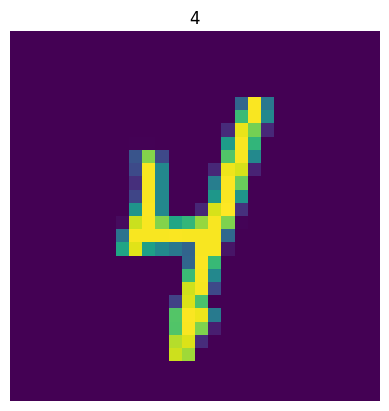

In [17]:
import matplotlib.pyplot as plt
plt.imshow(image)
plt.title(class_names[label.numpy()])
plt.axis(False);

In [76]:
def preprocess_img(image, label):
  image = tf.cast(image, tf.float32) / 255.
  return image, label

In [77]:
preprocessed_img, _ = preprocess_img(image, label)
preprocessed_img.shape

TensorShape([28, 28, 1])

In [78]:
train_data = train_data.map(map_func=preprocess_img, num_parallel_calls=tf.data.AUTOTUNE)
train_data = train_data.shuffle(buffer_size=1000).batch(batch_size=32).prefetch(buffer_size=tf.data.AUTOTUNE)
test_data = test_data.map(map_func=preprocess_img, num_parallel_calls=tf.data.AUTOTUNE)
test_data = test_data.batch(32).prefetch(tf.data.AUTOTUNE)

In [79]:
train_data, test_data

(<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 28, 28, 1), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int64, name=None))>,
 <_PrefetchDataset element_spec=(TensorSpec(shape=(None, 28, 28, 1), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int64, name=None))>)

In [89]:
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

input_shape = (28, 28, 1)

model_1 = Sequential([
    Conv2D(filters=10,
           kernel_size=3,
           activation="relu",
           input_shape=input_shape),
    MaxPool2D(pool_size=2,
              padding="valid"),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(pool_size=2,
              padding="valid"),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(pool_size=2,
              padding="valid"),
    Flatten(),
    Dense(len(class_names), activation="softmax")
])

model_1.compile(loss="sparse_categorical_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])

In [90]:
model_1.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_33 (Conv2D)          (None, 26, 26, 10)        100       
                                                                 
 max_pooling2d_33 (MaxPoolin  (None, 13, 13, 10)       0         
 g2D)                                                            
                                                                 
 conv2d_34 (Conv2D)          (None, 11, 11, 10)        910       
                                                                 
 max_pooling2d_34 (MaxPoolin  (None, 5, 5, 10)         0         
 g2D)                                                            
                                                                 
 conv2d_35 (Conv2D)          (None, 3, 3, 10)          910       
                                                                 
 max_pooling2d_35 (MaxPoolin  (None, 1, 1, 10)       

In [91]:
history_1 = model_1.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=int(0.15 * len(test_data)))

Epoch 1/5
1875/1875 [==============================] - 27s 9ms/step - loss: 0.5660 - accuracy: 0.8205 - val_loss: 0.2139 - val_accuracy: 0.9443
Epoch 2/5
1875/1875 [==============================] - 14s 7ms/step - loss: 0.2093 - accuracy: 0.9370 - val_loss: 0.1559 - val_accuracy: 0.9565
Epoch 3/5
1875/1875 [==============================] - 13s 7ms/step - loss: 0.1626 - accuracy: 0.9499 - val_loss: 0.1330 - val_accuracy: 0.9667
Epoch 4/5
1875/1875 [==============================] - 13s 7ms/step - loss: 0.1396 - accuracy: 0.9577 - val_loss: 0.1259 - val_accuracy: 0.9660
Epoch 5/5
1875/1875 [==============================] - 13s 7ms/step - loss: 0.1245 - accuracy: 0.9622 - val_loss: 0.1179 - val_accuracy: 0.9694


In [95]:
model_2 = Sequential([
    Conv2D(filters=10,
           kernel_size=3,
           activation="relu",
           input_shape=input_shape),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(pool_size=2,
              padding="valid"),
    Conv2D(10, 3, activation="relu"),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(pool_size=2,
              padding="valid"),
    Flatten(),
    Dense(len(class_names), activation="softmax")
])

model_2.compile(loss="sparse_categorical_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])

In [96]:
history_2 = model_2.fit(train_data,
                        epochs=3,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=int(0.15 * len(test_data)))

Epoch 1/3
1875/1875 [==============================] - 17s 8ms/step - loss: 0.2554 - accuracy: 0.9202 - val_loss: 0.0956 - val_accuracy: 0.9735
Epoch 2/3
1875/1875 [==============================] - 14s 8ms/step - loss: 0.0914 - accuracy: 0.9717 - val_loss: 0.0619 - val_accuracy: 0.9803
Epoch 3/3
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0696 - accuracy: 0.9786 - val_loss: 0.0647 - val_accuracy: 0.9796


In [99]:
model_3 = Sequential([
    Conv2D(filters=10,
           kernel_size=3,
           activation="relu",
           input_shape=input_shape),
    Conv2D(10, 3, activation="relu"),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(pool_size=2,
              padding="valid"),
    Conv2D(10, 3, activation="relu"),
    Conv2D(10, 3, activation="relu"),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(pool_size=2,
              padding="valid"),
    Flatten(),
    Dense(len(class_names), activation="softmax")
])

model_3.compile(loss="sparse_categorical_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])

In [100]:
history_3 = model_3.fit(train_data,
                        epochs=3,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=int(0.15 * len(test_data)))

Epoch 1/3
1875/1875 [==============================] - 20s 9ms/step - loss: 0.3800 - accuracy: 0.8796 - val_loss: 0.1480 - val_accuracy: 0.9579
Epoch 2/3
1875/1875 [==============================] - 16s 8ms/step - loss: 0.1301 - accuracy: 0.9607 - val_loss: 0.0844 - val_accuracy: 0.9735
Epoch 3/3
1875/1875 [==============================] - 16s 8ms/step - loss: 0.0906 - accuracy: 0.9725 - val_loss: 0.0539 - val_accuracy: 0.9823


In [103]:
model_4 = Sequential([
    Conv2D(filters=10,
           kernel_size=3,
           activation="relu",
           input_shape=input_shape),
    Conv2D(10, 3, activation="relu"),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(pool_size=2,
              padding="valid"),
    Conv2D(10, 3, activation="relu"),
    Conv2D(10, 3, activation="relu"),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(pool_size=2,
              padding="valid"),
    Flatten(),
    Dense(len(class_names), activation="softmax")
])

model_4.compile(loss="sparse_categorical_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])

In [104]:
history_4 = model_4.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=int(0.15 * len(test_data)))

Epoch 1/5
1875/1875 [==============================] - 19s 9ms/step - loss: 0.3524 - accuracy: 0.8891 - val_loss: 0.1126 - val_accuracy: 0.9667
Epoch 2/5
1875/1875 [==============================] - 16s 8ms/step - loss: 0.1213 - accuracy: 0.9628 - val_loss: 0.0899 - val_accuracy: 0.9721
Epoch 3/5
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0918 - accuracy: 0.9726 - val_loss: 0.0852 - val_accuracy: 0.9742
Epoch 4/5
1875/1875 [==============================] - 16s 8ms/step - loss: 0.0757 - accuracy: 0.9771 - val_loss: 0.0506 - val_accuracy: 0.9844
Epoch 5/5
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0664 - accuracy: 0.9793 - val_loss: 0.0486 - val_accuracy: 0.9851


In [110]:
model_5 = Sequential([
    Conv2D(filters=10,
           kernel_size=3,
           activation="relu",
           input_shape=input_shape),
    Conv2D(10, 3, activation="relu"),
    Conv2D(10, 3, activation="relu"),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(pool_size=2,
              padding="valid"),
    Conv2D(10, 3, activation="relu"),
    Conv2D(10, 3, activation="relu"),
    Conv2D(10, 3, activation="relu"),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(pool_size=2,
              padding="valid"),
    Flatten(),
    Dense(len(class_names), activation="softmax")
])

model_5.compile(loss="sparse_categorical_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])

In [111]:
history_5 = model_5.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=int(0.15 * len(test_data)))

Epoch 1/5
1875/1875 [==============================] - 43s 14ms/step - loss: 0.3875 - accuracy: 0.8763 - val_loss: 0.1617 - val_accuracy: 0.9518
Epoch 2/5
1875/1875 [==============================] - 18s 9ms/step - loss: 0.1311 - accuracy: 0.9613 - val_loss: 0.0809 - val_accuracy: 0.9783
Epoch 3/5
1875/1875 [==============================] - 17s 9ms/step - loss: 0.0973 - accuracy: 0.9709 - val_loss: 0.0615 - val_accuracy: 0.9769
Epoch 4/5
1875/1875 [==============================] - 18s 10ms/step - loss: 0.0819 - accuracy: 0.9752 - val_loss: 0.0488 - val_accuracy: 0.9851
Epoch 5/5
1875/1875 [==============================] - 18s 9ms/step - loss: 0.0719 - accuracy: 0.9783 - val_loss: 0.0452 - val_accuracy: 0.9871


In [114]:
model_6 = tf.keras.models.clone_model(model_5)
model_6.compile(loss="sparse_categorical_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])

In [115]:
history_6 = model_6.fit(train_data,
                        epochs=10,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=int(0.15 * len(test_data)))

Epoch 1/10
1875/1875 [==============================] - 21s 9ms/step - loss: 0.4315 - accuracy: 0.8614 - val_loss: 0.1532 - val_accuracy: 0.9531
Epoch 2/10
1875/1875 [==============================] - 18s 10ms/step - loss: 0.1362 - accuracy: 0.9583 - val_loss: 0.0945 - val_accuracy: 0.9762
Epoch 3/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.0936 - accuracy: 0.9715 - val_loss: 0.0594 - val_accuracy: 0.9837
Epoch 4/10
1875/1875 [==============================] - 18s 9ms/step - loss: 0.0777 - accuracy: 0.9764 - val_loss: 0.0599 - val_accuracy: 0.9817
Epoch 5/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.0652 - accuracy: 0.9800 - val_loss: 0.0561 - val_accuracy: 0.9837
Epoch 6/10
1875/1875 [==============================] - 18s 9ms/step - loss: 0.0603 - accuracy: 0.9819 - val_loss: 0.0381 - val_accuracy: 0.9885
Epoch 7/10
1875/1875 [==============================] - 17s 9ms/step - loss: 0.0539 - accuracy: 0.9838 - val_loss: 0.0496 - val

In [92]:
# Get helper functions file
import os

if not os.path.exists("helper_functions.py"):
    !wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
else:
    print("[INFO] 'helper_functions.py' already exists, skipping download.")

--2023-08-23 08:35:17--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0s      

2023-08-23 08:35:17 (68.4 MB/s) - ‘helper_functions.py’ saved [10246/10246]



In [93]:
from helper_functions import create_tensorboard_callback, plot_loss_curves, compare_historys

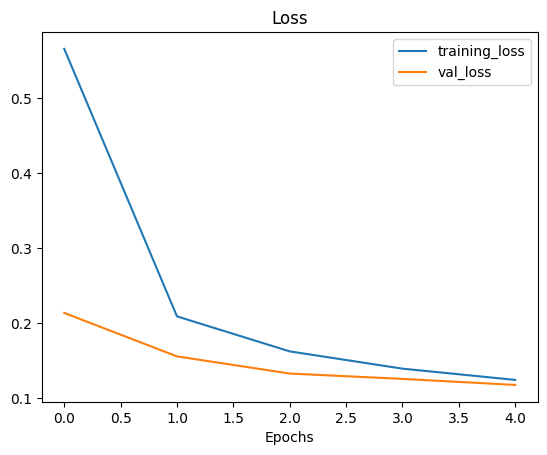

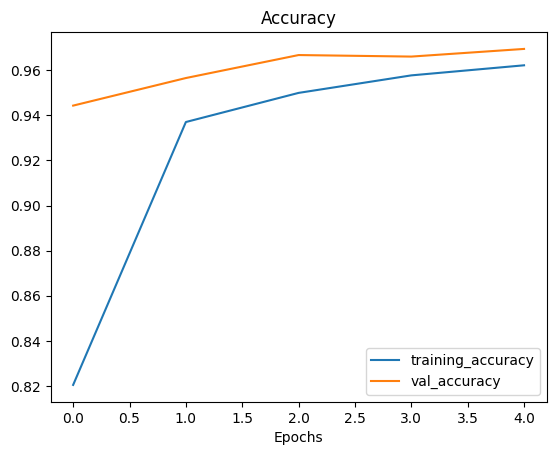

In [94]:
plot_loss_curves(history_1)

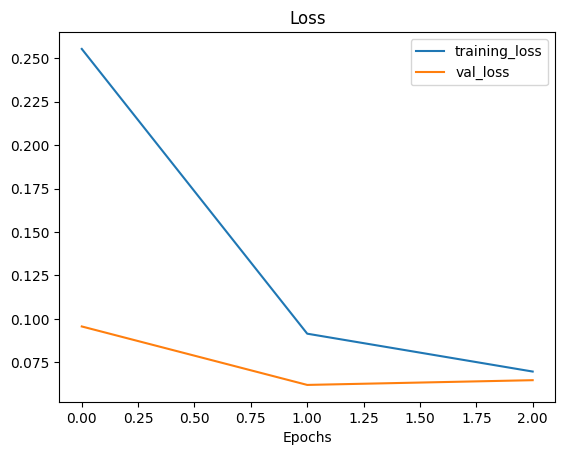

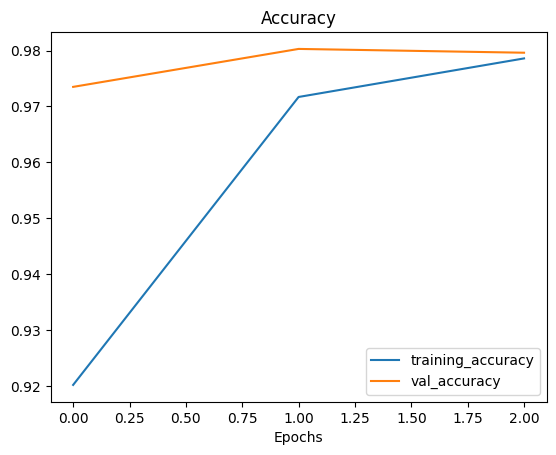

In [101]:
plot_loss_curves(history_2)

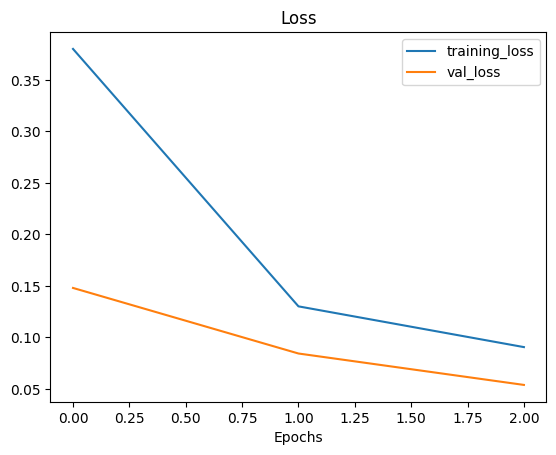

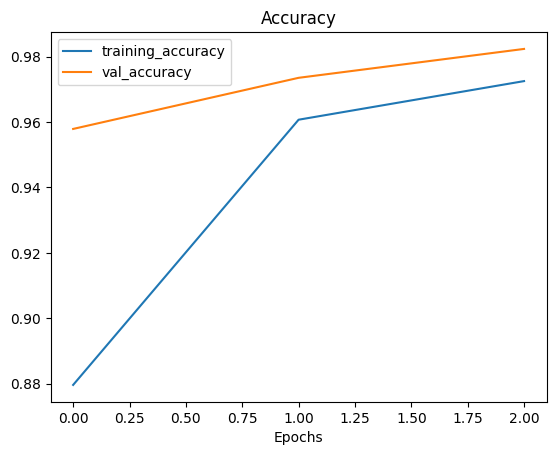

In [102]:
plot_loss_curves(history_3)

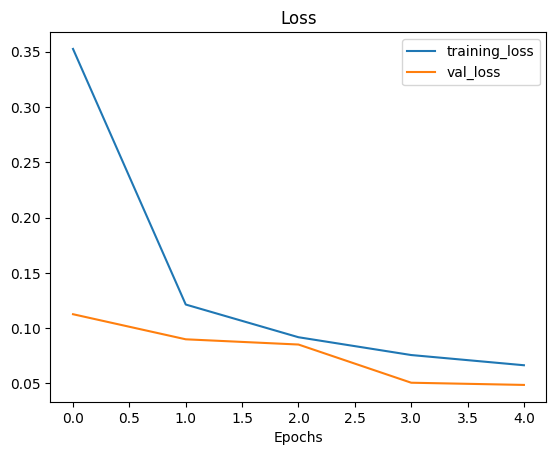

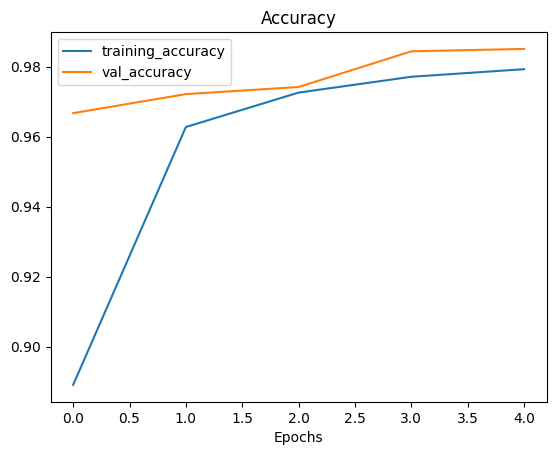

In [116]:
plot_loss_curves(history_4)

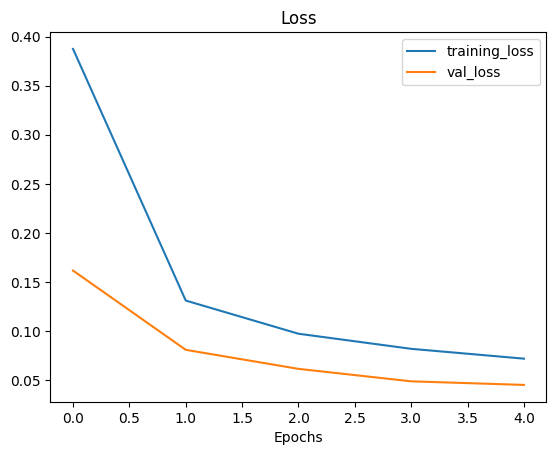

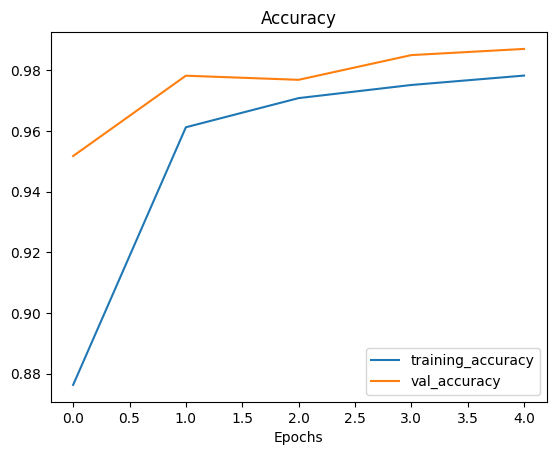

In [117]:
plot_loss_curves(history_5)

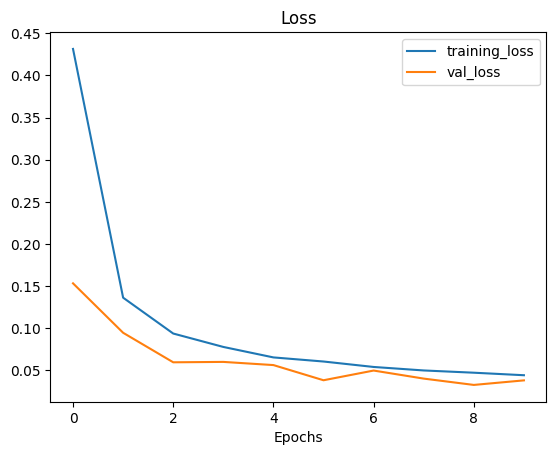

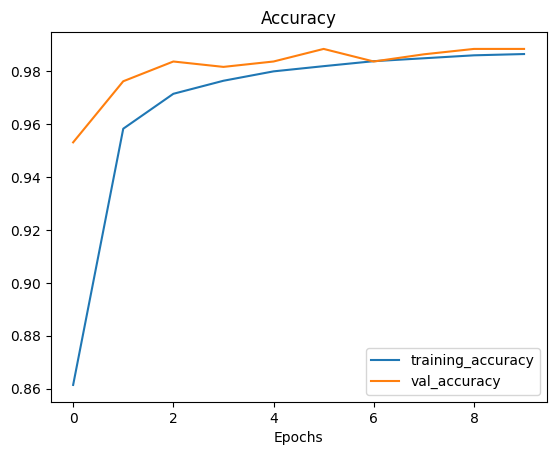

In [118]:
plot_loss_curves(history_6)

In [120]:
pred_model_1 = model_1.evaluate(test_data)
pred_model_2 = model_2.evaluate(test_data)
pred_model_3 = model_3.evaluate(test_data)
pred_model_4 = model_4.evaluate(test_data)
pred_model_5 = model_5.evaluate(test_data)
pred_model_6 = model_6.evaluate(test_data)

313/313 [==============================] - 2s 5ms/step - loss: 0.0435 - accuracy: 0.9867


In [122]:
print(f"""
Model 1 Prediction Accuracy: {pred_model_1[1]}
Model 2 Prediction Accuracy: {pred_model_2[1]}
Model 3 Prediction Accuracy: {pred_model_3[1]}
Model 4 Prediction Accuracy: {pred_model_4[1]}
Model 5 Prediction Accuracy: {pred_model_5[1]}
Model 6 Prediction Accuracy: {pred_model_6[1]}
""")


Model 1 Prediction Accuracy: 0.9653000235557556   
Model 2 Prediction Accuracy: 0.9819999933242798   
Model 3 Prediction Accuracy: 0.9804999828338623   
Model 4 Prediction Accuracy: 0.9836000204086304   
Model 5 Prediction Accuracy: 0.9815999865531921   
Model 6 Prediction Accuracy: 0.9866999983787537   



# Conclusion

- For MNIST dataset, increasing the number of Convoluted layers side-by-side and increasing the number of training epochs increases the accuracy of the prediction.